# Explainable AI Assignment


## Import Libraries

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the data
Display the first 5 rows of the data after loading.

In [47]:
heart_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )
heart_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


## Perform Basic Exploratory Data Analysis

Things to do in EDA
1. Check if there is null value, if yes then fill the same with Mean, Median or Mode
2. Check the relation or Correlation among the features with the target variable
3. Check if there is any categorical value in the data, If yes then change it to numerical value with the Label Encoding or One Hot Encoder
4. Check the Imbalance of Data, If Yes then Balance the data with the Help of Imblearn
5. Check the Outlier in the data

In [5]:
# Check if there is null value in the data
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<!-- Since there is no null value in the data, will proceed further -->

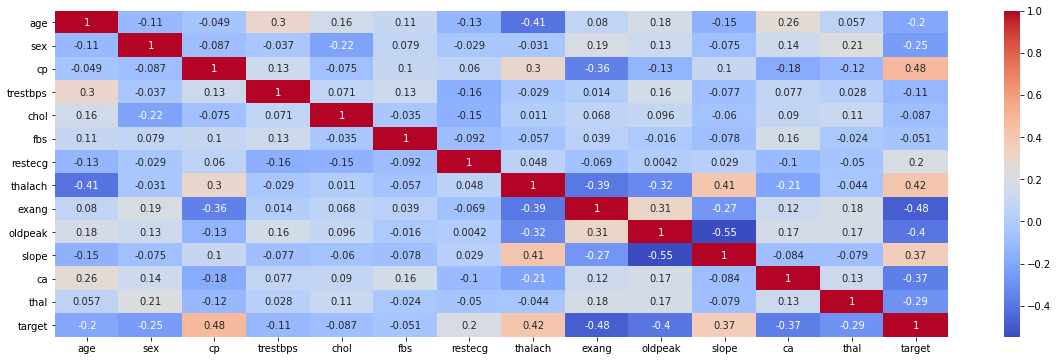

In [ ]:
# Relationship among the variables
plt.figure(figsize=(20,6))
sns.heatmap(heart_data.corr(),annot = True,cmap = "coolwarm")

As if we can see from the above plot - CP,Restecg,Thalach,Slope features have higher correlation with the target variable

Exang Feature has negative correlation with the data

As if we can see from the above plot - CP,Restecg,Thalach,Slope features have higher correlation with the target variable

Exang Feature has negative correlation with the data

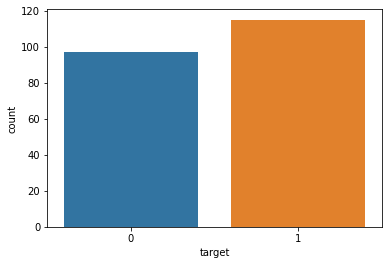

In [ ]:
# Check the imbalance in Target data

sns.countplot(x = 'target',data = heart_data)

In [ ]:
# Outlier in the Data through Box Plot
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.561321,0.688679,0.915094,132.127358,247.830189,0.165094,0.537736,148.995283,0.330189,1.008491,1.448113,0.783019,2.320755,0.542453
std,9.493376,0.464130,1.008193,17.440700,53.199877,0.372144,0.527437,23.332645,0.471394,1.141681,0.601850,1.066551,0.646495,0.499374
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.750000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,57.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,151.500000,0.000000,0.650000,2.000000,0.000000,2.000000,1.000000
75%,61.250000,1.000000,2.000000,140.000000,277.000000,0.000000,1.000000,165.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3dc0c9b320>,
      dtype=object)

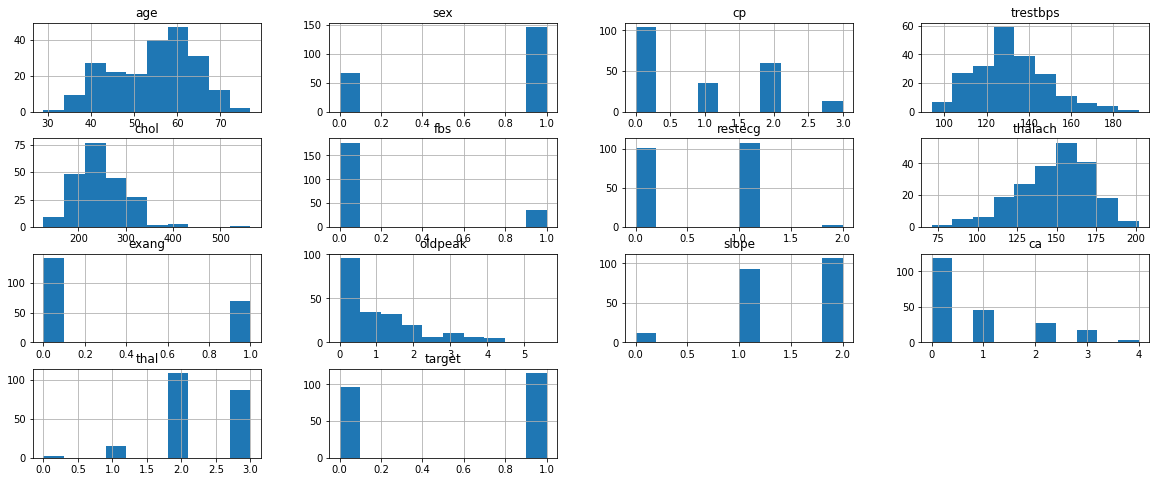

In [ ]:
heart_data.hist(figsize=(20,8))

## Separate the Input and Target Features of the data

In [48]:
X = heart_data.drop('target',axis = 1)
y = heart_data['target']
np.random.seed(0)

## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

## Scale your data if required

In [50]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform(X_train)

X_test_norm = norm.transform(X_test)

In [51]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)

## Build a Logistic Regression Model on train set

In [52]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=10000)


lr_model.fit(X_train,y_train)

pred_lr = lr_model.predict(X_test)

In [11]:
pred_lr

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1])

## Evaluate the model using F1 Score

In [12]:
from sklearn.metrics import f1_score

f1_score(y_test,pred_lr)

0.8399999999999999

## Feature Selection 

In [53]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator = lr_model,step=1)

rfe_fit = rfe.fit(X_train_norm,y_train)

print("Num Features: %d" % rfe_fit.n_features_)

Num Features: 6


In [14]:
# Features Ranking
selected_rfe_features = pd.DataFrame({'Feature':list(X_train_norm.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
2,cp,1
7,thalach,1
8,exang,1
9,oldpeak,1
11,ca,1
12,thal,1
10,slope,2
6,restecg,3
3,trestbps,4
1,sex,5


As we can CP, Thalach,Exang,Old Peak,CA and Thal are the number one features to Predict whether person will have heart disease or not

In [67]:
X_train_rfe = rfe.transform(X_train_norm)
X_test_rfe = rfe.transform(X_test_norm)


lr_rfe_model = lr_model.fit(X_train_rfe,y_train)

In [55]:
f1_score(y_test,lr_rfe_model.predict(X_test_rfe))

0.8461538461538461

## XG Boost

In [18]:
!pip install xgboost

Feature Importance : [0.03184108 0.03590363 0.25556862 0.0485769  0.03086559 0.0141379
 0.05839447 0.06309567 0.14578414 0.06457709 0.01852193 0.06534797
 0.16738503]


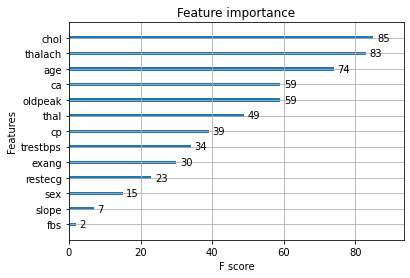

In [19]:
from xgboost import XGBClassifier
from xgboost import plot_importance


# fit the model
xgb = XGBClassifier(random_state = 0)
xgb.fit(X_train_norm,y_train)


print("Feature Importance :",xgb.feature_importances_)


#Plot the important Features

plot_importance(xgb)
plt.show()

In [20]:
from sklearn.feature_selection import SelectFromModel

selection = SelectFromModel(xgb)
selection.fit(X_train_norm,y_train)

# transform the train and test dataset

x_train_new = selection.transform(X_train_norm)
x_test_new = selection.transform(X_test_norm)

# train the model
xgb_new = XGBClassifier()
xgb_new.fit(x_train_new,y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [21]:
f1_score(y_test,xgb_new.predict(x_test_new))

0.6666666666666665

## Test Data

In [103]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Testing_set_heart.csv')
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,46,0,0,138,243,0,0,152,1,0.0,1,0,2
1,45,0,0,138,236,0,0,152,1,0.2,1,0,2
2,59,1,3,160,273,0,0,125,0,0.0,2,0,2
3,44,0,2,108,141,0,1,175,0,0.6,1,0,2
4,47,1,2,108,243,0,1,152,0,0.0,2,0,2


In [23]:
test_data.shape

(91, 13)

In [ ]:
test_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [104]:
# Feature Scaling on Test Data
test_data_norm = norm.transform(test_data)

In [105]:
test_data_norm = pd.DataFrame(test_data_norm, columns = test_data.columns)

In [106]:
test_data_rfe = rfe.transform(test_data_norm)

In [107]:
pre_val_rfe = lr_rfe_model.predict(test_data_rfe)

In [38]:
res = pd.DataFrame(pre_val_rfe)
res.index = test_data.index
res.columns = ['prediction']

# to download the file locally
from google.colab import files
res.to_csv("Assignment_2.csv")
files.download("Assignment_2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##  Use a SHAP Explainer to derive SHAP Values for the logistic regression model.

In [56]:
! pip install shap

In [57]:
import shap

In [95]:
explainer = shap.LinearExplainer(lr_rfe_model,X_train_rfe)
shap_values = explainer.shap_values(new_test_dataframe)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [80]:
feature_names = list(X_train_norm.columns.values)

mask = rfe.get_support()

new_features = []

for bool,feature in zip(mask,feature_names):
  if bool:
    new_features.append(feature)


train_dataframe = pd.DataFrame(X_train_rfe,columns=new_features)

In [81]:
feature_names = list(X_test_norm.columns.values)

mask = rfe.get_support()

new_features = []

for bool,feature in zip(mask,feature_names):
  if bool:
    new_features.append(feature)


test_dataframe = pd.DataFrame(X_test_rfe,columns=new_features)

In [108]:
feature_names = list(test_data_norm.columns.values)

mask = rfe.get_support()

new_features = []

for bool,feature in zip(mask,feature_names):
  if bool:
    new_features.append(feature)


new_test_dataframe = pd.DataFrame(test_data_norm,columns=new_features)

## Plot a SHAP summary plot using all the features in the data

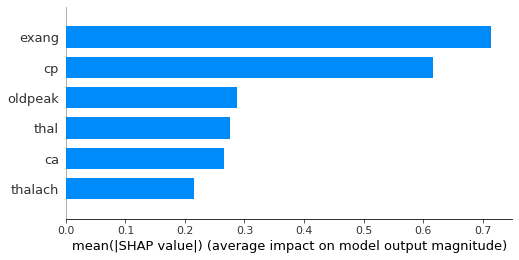

In [96]:
shap.summary_plot(shap_values,new_test_dataframe,plot_type='bar')

Our Model has detected that out of 13 features that was given in the dataset, 6 Features are the most important features that helped us to identify whether that person has heart disease or not


The Most Important that has SHAP value of more than 0.5 are Chest Pain (CP) and Exercise Induced Angina)

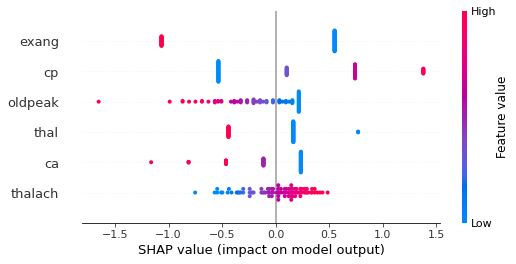

In [111]:
shap.initjs
shap.summary_plot(shap_values,new_test_dataframe)

We can conclude from the above plot that :- 

CP ( Chest Pain) has higher impact on the model prediction

Aa we can the higher value for CP is 1.5 at red zone which means it has impacted few prediction by a large amount While Exang which was the top feature from the above model has impacted very few prediction.

Instead of Exang, Thalach (Blood flow) has affected few of the predictions.



# Task 4

## Plot a SHAP force plot for the first row of test data.

In [109]:
pre_val_rfe[0]

0

Predicted Value for the first row is 0 which means this person doesnot have heart disease 

In [99]:
shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values[0,:],new_test_dataframe.iloc[0,:])

The Reason why this person doesnot have heart disease because two main feature which we have seen in the above diagram (CP and Exang) which are crucial for a person to have a heart disease are in the blue zone 

His Overall score is -0.78 which is less than the base value which is 0.1867, which is a positive point






# Task 5

## Plot a SHAP force plot for all the rows of the data

In [110]:
shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values[:,:],new_test_dataframe.iloc[:,:])

# Task 7

## Plot a dependence plot to show the effect of ‘chol’ across the whole dataset.

In [ ]:
shap

## Write your inferences from the generated plot.